## 线性代数基础

### 对称矩阵


## PCA Dimensionality reduction with principle components

**Principle component analysis**, or **PCA**, is an alternative to regularization and straight-forward feature elimination. PCA is particularly useful for problems with very large numbers of features compared to the number of training cases. For example, when faced with a problem with many thousands of features and perhaps a few thousand cases, PCA can be a good choice to **reduce the dimensionality** of the feature space.  

PCA is one of a family of transformation methods that reduce dimensionality. PCA is the focus here, since it is the most widely used of these methods. 

The basic idea of PCA is rather simple: Find a linear transformation of the feature space which **projects the majority of the variance（方差）** onto a few orthogonal（正交的） dimensions in the transformed space. The PCA transformation maps the data values to a new coordinate system defined by the principle components. Assuming the highest variance directions, or **components**, are the most informative, low variance components can be eliminated from the space with little loss of information. 

The projection along which the greatest variance occurs is called the **first principle component**. The next projection, orthogonal to the first, with the greatest variance is call the **second principle component**. Subsequent components are all mutually orthogonal with decreasing variance along the projected direction.  

Widely used PCA algorithms compute the components sequentially, starting with the first principle component. This means that it is computationally efficient to compute the first several components from a very large number of features. Thus, PCA can make problems with very large numbers of features computationally tractable（易处理的）. 

****
**Note:** It may help your understanding to realize that principle components are a scaled version of the **eigenvectors** of the feature matrix. The scale for each dimensions is given by the **eigenvalues**. The eigenvalues are the fraction of the variance explained by the components. 
****

## A simple example

To cement the concepts of PCA you will now work through a simple example. This example is restricted to 2-d data so that the results are easy to visualize. 

As a first step, execute the code in cell below to load the packages required for the rest of this notebook.
The code in the cell below simulates data from a bivariate Normal distribution. The distribution is deliberately centered on $\{ 0,0 \}$ and with unit variance on each dimension. There is considerable correlation between the two dimensions leading to a covariance matrix:

$$cov(X) =  \begin{bmatrix}
  1.0 & 0.6 \\
  0.6 & 1.0
 \end{bmatrix}$$

Given the covariance matrix 100 draws from this distribution are computed using the `multivariate_normal` function from the Numpy `random` package. Execute this code:

In [24]:
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.decomposition as skde
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [32]:
#模拟一个协方差为指定正态分布的二特征矩阵。
nr.seed(124)
cov = np.array([[1.0, 0.6], [0.6, 1.0]])
mean = np.array([0.0, 0.0])

sample = nr.multivariate_normal(mean, cov, 100)
sample.shape
 

(100, 2)

To get a feel for this data, execute the code in the cell below to display a plot and examine the result. 

Text(0.5, 1.0, 'Sample data')

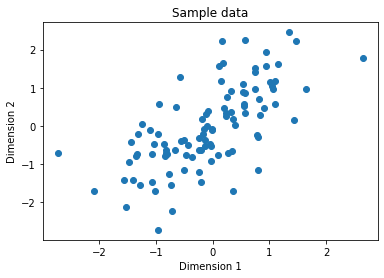

In [34]:
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

You can see that the data have a roughly elliptical(椭圆的) pattern. The correlation between the two dimensions is also visible. 

With the simulated data set created, it is time to compute the PCA model. The code in the cell below does the following:
1. Define a PCA model object using the `PCA` function from the scikit-learn `decomposition` package.
2. Fit the PCA model to the sample data.
3. Display the ratio of the **variance explained** by each of the components, where, for a matrix X, this ratio is given by:

$$VE(X) = \frac{Var_{X-component}(X)}{Var_{X-total}(X)}$$

Notice that by construction:

$$VE(X) = \sum_{i=1}^N VE_i(X) = 1.0$$

In other words, the sum of the variance explained for each component must add to the total variance or 1.0 for standardized data. 

Execute this code and examine the result.

In [50]:
pca_model = skde.PCA()
pca_fit = pca_model.fit(sample)
print(pca_fit.explained_variance_ratio_)
#### 使用numpy计算特征值和特征值所构成的对角化矩阵
sample.T 
cov_s=np.cov(sample.T)
lamda,Q=np.linalg.eig(cov_s)
print(lamda)
print(Q.T)

[0.84530942 0.15469058]
[0.30761153 1.68094861]
[[-0.79583003  0.60552007]
 [-0.60552007 -0.79583003]]


Notice that the explained variance of the first component is many times larger than for the second component. This is exactly the desired result indicating the first principle component explains the majority of the variance of the sample data. 

The code in the cell below computes and prints the scaled components. Mathematically, the scaled components are the eigenvectors scaled by the eigenvalues. Execute this code:  

In [37]:
comps = pca_fit.components_
for i in range(2):
    comps[:,i] = comps[:,i] * pca_fit.explained_variance_ratio_
print(comps)

[[ 0.51185182  0.67272262]
 [-0.12310741  0.09366825]]


Notice that the two vectors have their origins at $[ 0,0 ]$, and are quite different magnitude, and are pointing in different directions.  

To better understand how the projections of the components relate to the data, execute the code to plot the data along with the principle components. Execute this code: 

Text(0.5, 1.0, 'Sample data')

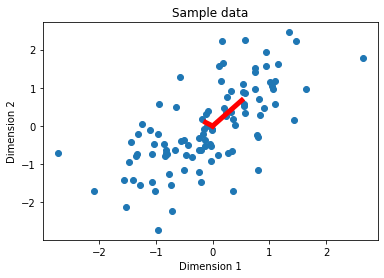

In [38]:
plt.scatter(sample[:,0], sample[:,1])
# plt.plot([0.0, comps[0,0]], [0.0,comps[0,1]], color = 'red', linewidth = 5)
# plt.plot([0.0, comps[1,0]], [0.0,comps[1,1]], color = 'red', linewidth = 5)
plt.plot([0.0, comps[0,0]], [0.0,comps[0,1]], color = 'red', linewidth = 5)
plt.plot([0.0, comps[1,0]], [0.0,comps[1,1]], color = 'red', linewidth = 5)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

Notice the the fist principle component (the long red line) is along the direction of greatest variance of the data. This is as expected. The short red line is along the direction of the second principle component. The lengths of these lines is the variance in the directions of the projection. 

The ultimate goal of PCA is to transform data to a coordinate system with the highest variance directions along the axes. The code in the cell below uses the `transform` method on the PCA object to perform this operation and then plots the result. Execute this code: 

Text(0.5, 1.0, 'Sample data')

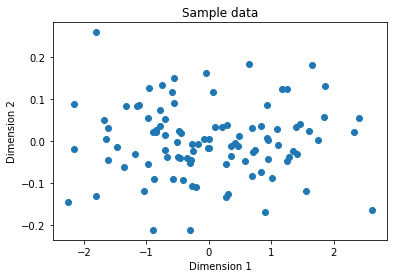

In [40]:
trans = pca_fit.transform(sample)
plt.scatter(trans[:,0], trans[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

Notice that the scale along these two coordinates are quite different. The first principle component is along the horizontal axis. The range of values on this direction is in the range of about $\{ -2.5,2.5 \}$. The range of values on the vertical axis or second principle component are only about $\{ -0.2, 0.3 \}$. It is clear that most of the variance is along the direction of the fist principle component. 

In [60]:
# 定义一个矩阵代表样本
import numpy as np 
x=np.array([2,2,4,8,4])
y=np.array([2,6,6,8,8])
data=np.vstack((x,y))
print(data)
print(data.shape)
data_cov=np.cov(data)
print("得到两个特征属性x,y 的协方差，是一个对称矩阵")
print(data_cov)
print("实现特征属性的0均值化处理")
def toZero(x:np.array)->np.array:
    m=np.mean(x)
    return x-m
x=toZero(x)
y=toZero(y)
data2=np.vstack((x,y))
data_cov=np.cov(data2)
print("零均值化处理后，协方差矩阵不变")
print(data_cov)
print("实现协方差矩阵的对角化")
print("通过特征向量，特征值实现：")
eig,Q=np.linalg.eig(data_cov)
print(eig)
print("注意pyhton中特征向量构成矩阵转置后，才是新的空间矩阵")
print(Q.T)
print("将特征值实现对角化再除(n-1)，就是协方差对应的对角化矩阵")
sigma=np.diag(eig)/(data.shape[1]-1)
print(sigma)
print("实现原样本到新空间的转换")
newV=Q.T@data2
print(newV)
print(data2)
print(Q)

pca_model = skde.PCA()
pca_fit = pca_model.fit(data.T)
 
 

comps = pca_fit.components_
print(comps)
print(pca_fit.explained_variance_ratio_)

[[2 2 4 8 4]
 [2 6 6 8 8]]
(2, 5)
得到两个特征属性x,y 的协方差，是一个对称矩阵
[[6. 4.]
 [4. 6.]]
实现特征属性的0均值化处理
零均值化处理后，协方差矩阵不变
[[6. 4.]
 [4. 6.]]
实现协方差矩阵的对角化
通过特征向量，特征值实现：
[10.  2.]
注意pyhton中特征向量构成矩阵转置后，才是新的空间矩阵
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
将特征值实现对角化再除(n-1)，就是协方差对应的对角化矩阵
[[2.5 0. ]
 [0.  0.5]]
实现原样本到新空间的转换
[[-4.24264069 -1.41421356  0.          4.24264069  1.41421356]
 [-1.41421356  1.41421356  0.         -1.41421356  1.41421356]]
[[-2. -2.  0.  4.  0.]
 [-4.  0.  0.  2.  2.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[0.83333333 0.16666667]


## SVD (Singular Value Decomposition）奇异值分解
https://zhuanlan.zhihu.com/p/29846048
> 优点：简化数据，去除噪声，提高算法的结果
> 
> 缺点：数据的转换可能难以理解
> 
> 适用数据范围：数值型数据
利用SVD实现，可以能够用小的多的数据来表示原始数据，如此，实际上是去除了噪声和多余信息。
---
结合特征分解知识

特征值的分解使用于

SVD是将任意复杂（注意对比特征分解只能适用于方阵）的矩阵用更小，更简单的3个矩阵的相乘表示，用这3个小矩阵来描述大矩阵的重要特征。

利用SVD 可以从稀疏矩阵（矩阵中有大量元素值为0）中提取有价值的信息，减少计算量，在使用线性代数的地方，基本上都要使用SVD。

SVD不但应用在PCA、图像压缩、数字水印、推荐系统和文章分类、LSA中，是很多机器学习算法基石。

### SVD数学定义
与特征值分解不同，SVD不要求原始矩阵为方阵。

$$ A=U_{m \times m} \Sigma_{m \times n} V^T_{n \times n}$$
-------
 A 为$m \times n$矩阵，$A \times A^T$ 将得到一个对称矩阵，即$A_{ij}=A_{ji}$
*  $U$ 是一个$m \times m$的矩阵，
*  $ \Sigma$ 是一个 $m \times n$ 的矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为奇异值。奇异值矩阵是一个对角矩阵，除了对角元素外其他元素都为0
*  $V$ 是一个 $n \times n$ 的矩阵。
*  
$U$和$V$ 都是酉矩阵，即满足
$U^T T=E_{m \times m} , V^TV=E_{n \times n}$

 ---

 

>SVD是对数据进行有效特征整理的过程。首先，对于一个m×n矩阵A，我们可以理解为其有m个数据，n个特征，（想象成一个n个特征组成的坐标系中的m个点），然而一般情况下，这n个特征并不是正交的，也就是说这n个特征并不能归纳这个数据集的特征。SVD的作用就相当于是一个坐标系变换的过程，从一个不标准的n维坐标系，转换为一个标准的k维坐标系，并且使这个数据集中的点，到这个新坐标系的欧式距离为最小值（也就是这些点在这个新坐标系中的投影方差最大化），其实就是一个最小二乘的过程。进一步，如何使数据在新坐标系中的投影最大化呢，那么我们就需要让这个新坐标系中的基尽可能的不相关，我们可以用协方差来衡量这种相关性。A^T·A中计算的便是n×n的协方差矩阵，每一个值代表着原来的n个特征之间的相关性。当对这个协方差矩阵进行特征分解之后，我们可以得到奇异值和右奇异矩阵，而这个右奇异矩阵则是一个新的坐标系，奇异值则对应这个新坐标系中每个基对于整体数据的影响大小，我们这时便可以提取奇异值最大的k个基，作为新的坐标，这便是PCA的原理。

通过python中np.linga.svd 求奇异分解
 Python中svd后得到的sigma是一个行向量，Python中为了节省空间只保留了A的奇异值，所以我们需要将它还原为奇异值矩阵。同时需要注意的是，比如一个5*5 大小的矩阵的奇异值只有两个，但是他的奇异值矩阵应该是 5*5的，所以后面的我们需要手动补零，并不能直接使用diag将sigma对角化。
————————————————
https://blog.csdn.net/Cheese_pop/article/details/78346662

t

In [18]:
import numpy as np 
from numpy import linalg as la 
A=np.array([1,5,7,6,1,2,1,10,4,4, 3,6,7,5,2]).reshape(3,5)
print("A与自身转置相乘，得到一个对称矩阵：",A@A.T,"得到对称矩阵形状：",(A@A.T).shape)
print("原始矩阵：",A,"原始矩阵形状:",A.shape)
print(A@A.T)
U,s,Vt=la.svd(A)
Sigma=np.zeros(A.shape)#首先得到一个m*n的空矩阵，作为奇异值矩阵
print("左奇异矩阵",U,"矩阵形状：",U.shape)
print("右奇异矩阵",Vt,"矩阵形状：",Vt.shape)
 
for i in range(len(s)):#为奇异值矩阵对角元素赋值
    Sigma[i,i]=s[i]
print("奇异值矩阵：",Sigma,"奇异值矩阵形状：",Sigma.shape)

A与自身转置相乘，得到一个对称矩阵： [[112 105 114]
 [105 137 110]
 [114 110 123]] 得到对称矩阵形状： (3, 3)
原始矩阵： [[ 1  5  7  6  1]
 [ 2  1 10  4  4]
 [ 3  6  7  5  2]] 原始矩阵形状: (3, 5)
[[112 105 114]
 [105 137 110]
 [114 110 123]]
左奇异矩阵 [[-0.55572489  0.40548161 -0.72577856]
 [-0.59283199 -0.80531618  0.00401031]
 [-0.58285511  0.43249337  0.68791671]] 矩阵形状： (3, 3)
右奇异矩阵 [[-0.18828164 -0.37055755 -0.74981208 -0.46504304 -0.22080294]
 [ 0.01844501  0.76254787 -0.4369731   0.27450785 -0.38971845]
 [ 0.73354812  0.27392013 -0.12258381 -0.48996859  0.36301365]
 [ 0.36052404 -0.34595041 -0.43411102  0.6833004   0.30820273]
 [-0.5441869   0.2940985  -0.20822387 -0.0375734   0.7567019 ]] 矩阵形状： (5, 5)
奇异值矩阵： [[18.53581747  0.          0.          0.          0.        ]
 [ 0.          5.0056557   0.          0.          0.        ]
 [ 0.          0.          1.83490648  0.          0.        ]] 奇异值矩阵形状： (3, 5)


In [22]:
B=U@Sigma@Vt
print("同还原得到矩阵是否与原始矩阵相同：",np.allclose(A,B))

同还原得到矩阵是否与原始矩阵相同： True


 #### 基于SVD的维度压缩
 在进行压缩时，首先计算得到原始矩阵A（可以代表图片等），的对应$ U V_T\Sigma$矩阵，从中抽取信息量载荷大的k行，再还原新的矩阵 $A_,$ 对比原有矩阵$ A $得到压缩。

In [33]:
k=2
print("k值",k)
Sigma_k=Sigma[:k,:k]##奇异值矩阵选取k行ke列
print("奇异值矩阵选取k行k列:",Sigma_k)
U_k=U[:,:k]
print("右奇异矩阵选取k行",U_k)
Vt_k=Vt[:k,:]
print("左奇异矩阵选取列",Vt_k)

A_k=U_k@Sigma_k@Vt_k
print("通过计算得到压缩矩阵: \n",A_k)
print("原始矩阵 \n",A)


k值 2
奇异值矩阵选取k行k列: [[18.53581747  0.        ]
 [ 0.          5.0056557 ]]
右奇异矩阵选取k行 [[-0.55572489  0.40548161]
 [-0.59283199 -0.80531618]
 [-0.58285511  0.43249337]]
左奇异矩阵选取列 [[-0.18828164 -0.37055755 -0.74981208 -0.46504304 -0.22080294]
 [ 0.01844501  0.76254787 -0.4369731   0.27450785 -0.38971845]]
通过计算得到压缩矩阵: 
 [[ 1.97689227  5.36478923  6.83675076  5.3474913   1.48343826]
 [ 1.99460216  0.99798435 10.00090204  4.00360545  3.99732875]
 [ 2.07406947  5.6542408   7.15473299  5.61846914  1.54178136]]
原始矩阵 
 [[ 1  5  7  6  1]
 [ 2  1 10  4  4]
 [ 3  6  7  5  2]]


#### 实现图片压缩
https://blog.csdn.net/discoverer100/article/details/89356513

In [ ]:
!pip install pillow

In [ ]:
!pip install -U matplotlib

#### 图片处理背景
通过对png图像进行数组化操作，得到一个shape为3度的数组，即为3D张量，注意其每个度上的维度不同，3个度的保存的信息分别为高度信息，宽度信息和颜色通道信息。

例如下面代码得到图像的shape为(897, 631, 4)。其高度与长度构成


 图片形状： (1920, 1280, 3)
红色通道图片：
 对应矩阵shape (1920, 1280)
绿色通道图片:
蓝色通道图片:
[[176 177 177 ... 191 189 190]
 [175 176 177 ... 189 192 190]
 [175 176 177 ... 190 192 190]
 ...
 [189 188 190 ... 183 182 182]
 [190 188 190 ... 184 183 181]
 [192 189 190 ... 182 182 182]] (1920, 1280)


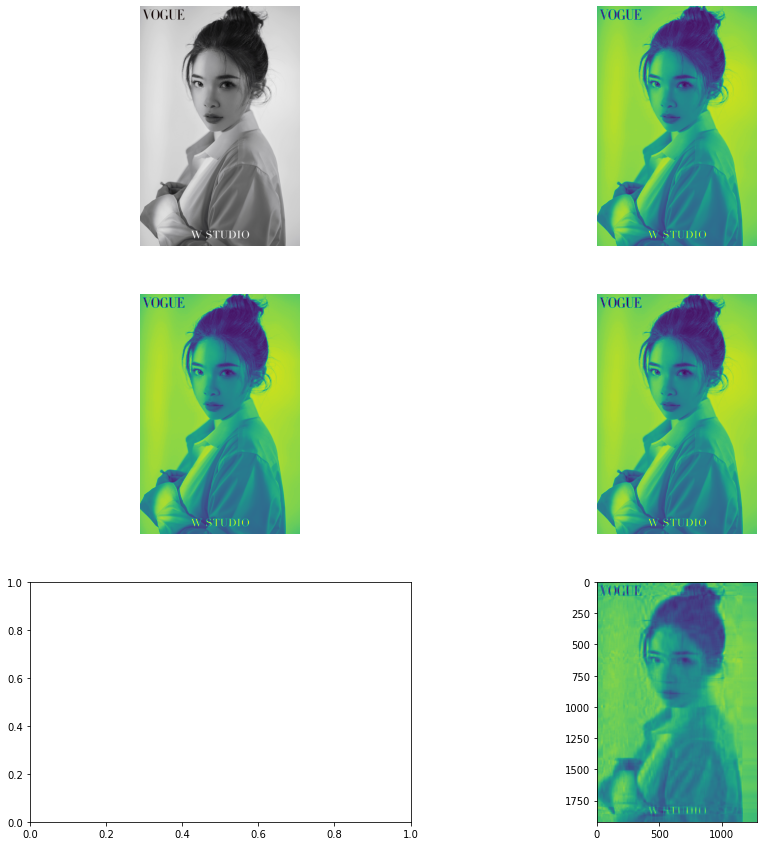

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def image_svd(A,k):
    U,s,Vt=np.linalg.svd(A)
    Sigma=np.zeros(A.shape)
    for i in range(len(s)):#为奇异值矩阵对角元素赋值
      Sigma[i,i]=s[i]
    Sigma_k=Sigma[:k,:k]
    U_k=U[:,:k]
    Vt_k=Vt[:k,:]
    return U_k@Sigma_k@Vt_k
   
def imageR(img):
      R=img[:,:,0]
      G=img[:,:,1]
      B=img[:,:,2]
      #A=img[:,:,3]
      return R,G,B#,A
def imageS(R,G,B):
      img=np.stack((R,G,B),2)
      return img
if __name__=="__main__":
    image=Image.open("girl.jpg","r")
    A=np.array(image)
    print("\n 图片形状：",A.shape)
  
    fig,axes=plt.subplots(3,2)
    fig.set_size_inches(15,15)
    ax1=axes[0,0]
    ax2=axes[0,1]
    ax3=axes[1,0]
    ax4=axes[1,1]
    ax5=axes[2,0]
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')#直接关闭坐标轴的可读性与表情
    ax1.imshow(image)
    R,G,B =imageR(A)
    print("红色通道图片：\n" ,"对应矩阵shape",R.shape)
    ax2.imshow(R)
    print("绿色通道图片:" )
    ax3.imshow(G)
    print("蓝色通道图片:" )
    ax4.imshow(B)
    #print("透明通道图片:" )
    #ax5.imshow(A2)
    k=20
    R_k=image_svd(R,k)
    G_k=image_svd(G,k)
    B_k=image_svd(B,k)
    #A_k=image_svd(A2,k)
    
    print(R,R.shape)
    img2=imageS(R_k,G_k,B_k)
    
    ax6=axes[2,1]
    ax6.imshow(G_k)
  

 
    
    

### SVD在推荐系统中的使用
> 推荐系统使用经典协同
在推荐系统中，我们常常遇到的问题是这样的，我们有很多用户和物品，也有少部分用户对少部分物品的评分，我们希望预测目标用户对其他未评分物品的评分，进而将评分高的物品推荐给目标用户。比如下面的用户物品评分表：

In [ ]:
p